# English Premier League (EPL) Pythagorean Predictor

## Step 1

In [1]:
# Load the packages
import pandas as pd
import numpy as np
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data. 
# EPL results for the 2017/18 season
EPL18 = pd.read_excel('Assignment Data/Week 1/EPL2017-18.xlsx')
print(EPL18.columns.tolist())

['Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']


In [5]:
EPL18

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,20170811,Arsenal,Leicester,4,3,H
1,20170812,Brighton,Man City,0,2,A
2,20170812,Chelsea,Burnley,2,3,A
3,20170812,Crystal Palace,Huddersfield,0,3,A
4,20170812,Everton,Stoke,1,0,H
5,20170812,Southampton,Swansea,0,0,D
6,20170812,Watford,Liverpool,3,3,D
7,20170812,West Brom,Bournemouth,1,0,H
8,20170813,Man United,West Ham,4,0,H
9,20170813,Newcastle,Tottenham,0,2,A


## Step 2

In [6]:
homewin=[]
for i in np.array(EPL18["FTR"]):
    if i=="H":
        homewin.append(1)
    elif i=="A":
        homewin.append(0)
    else:
        homewin.append(0.5)

In [7]:
EPL18["homewin"]=homewin

In [9]:
EPL18["awaywin"]=1-np.array(homewin)

In [14]:
EPL18["count"]=1

In [15]:
EPL_17=EPL18[EPL18.Date<20180000]
EPL_18=EPL18[EPL18.Date>20180000]

In [16]:
EPL_17_h=EPL_17.groupby("HomeTeam")["homewin","count","FTHG","FTAG"].sum().reset_index()
EPL_18_h=EPL_18.groupby("HomeTeam")["homewin","count","FTHG","FTAG"].sum().reset_index()
EPL_17_a=EPL_17.groupby("AwayTeam")["awaywin","count","FTHG","FTAG"].sum().reset_index()
EPL_18_a=EPL_18.groupby("AwayTeam")["awaywin","count","FTHG","FTAG"].sum().reset_index()

In [22]:
EPL_17_h.rename(columns={"HomeTeam":"Team","homewin":"points","FTHG":"for","FTAG":"against"},inplace=True)
EPL_17_a.rename(columns={"AwayTeam":"Team","awaywin":"points","FTHG":"against","FTAG":"for"},inplace=True)

## Step 3

In [21]:
EPL_18_h.rename(columns={"HomeTeam":"Team","homewin":"points","FTHG":"for","FTAG":"against"},inplace=True)
EPL_18_a.rename(columns={"AwayTeam":"Team","awaywin":"points","FTHG":"against","FTAG":"for"},inplace=True)

In [35]:
EPL17=EPL_17_h+EPL_17_a
#pd.concat([EPL_17_h,EPL_17_a]);
EPL18=EPL_18_h+EPL_18_a
#EPL_17_h.append(EPL_17_a)

In [36]:
EPL17["pyth17"]=EPL17["points"]/EPL17["count"]
EPL17["wpc17"]=EPL17["for"]**2/(EPL17["for"]**2+EPL17["against"]**2)

In [37]:
EPL18["pyth18"]=EPL18["points"]/EPL18["count"]
EPL18["wpc18"]=EPL18["for"]**2/(EPL18["for"]**2+EPL18["against"]**2)

## Optional steps, not required for Assessment 
### (Uncomment to run)

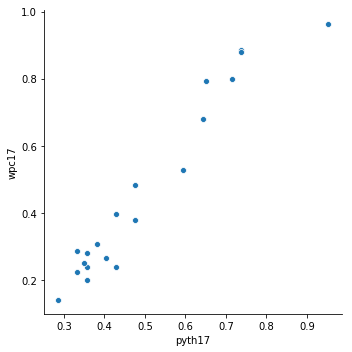

In [38]:
# Plot the data

sns.relplot(x="pyth17", y="wpc17", data =EPL17)

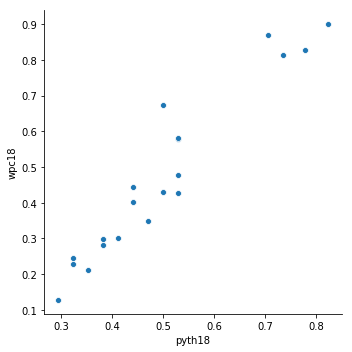

In [40]:
sns.relplot(x="pyth18", y="wpc18", data =EPL18)

In [39]:
# Run the regression

pyth_lm = smf.ols(formula = 'wpc17 ~ pyth17', data=EPL17).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc17   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.934
Method:                 Least Squares   F-statistic:                     269.6
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           2.81e-12
Time:                        12:02:58   Log-Likelihood:                 26.010
No. Observations:                  20   AIC:                            -48.02
Df Residuals:                      18   BIC:                            -46.03
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2542      0.046     -5.496      0.000      -0.351      -0.157
pyth17         1.4309      0.087     16.420      0.000       1.248       1.614
==============================================================================
Omnibus:                        0.919   Durbin-Watson:                   2.222
Prob(Omnibus):                  0.632   Jarque-Bera (JB):                0.727
Skew:                          -0.431   Prob(JB):                        0.695
Kurtosis:                       2.639   Cond. No.                         7.05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [41]:
pyth_lm = smf.ols(formula = 'wpc18 ~ pyth18', data=EPL18).fit()
pyth_lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  wpc18   R-squared:                       0.914
Model:                            OLS   Adj. R-squared:                  0.909
Method:                 Least Squares   F-statistic:                     191.1
Date:                Sun, 27 Jun 2021   Prob (F-statistic):           5.02e-11
Time:                        12:03:57   Log-Likelihood:                 25.488
No. Observations:                  20   AIC:                            -46.98
Df Residuals:                      18   BIC:                            -44.98
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.2581      0.055     -4.671      0.000      -0.374      -0.142
pyth18         1.4653      0.106     13.823      0.000       1.243       1.688
==============================================================================
Omnibus:                        9.263   Durbin-Watson:                   1.990
Prob(Omnibus):                  0.010   Jarque-Bera (JB):                6.570
Skew:                           1.199   Prob(JB):                       0.0374
Kurtosis:                       4.459   Cond. No.                         8.33
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Optional steps, not required for Assessment
### (Uncomment to run)

In [67]:
sum(EPL_18["count"])

171

In [ ]:
#sns.relplot(x="pyth17", y="wpc18", data =Half2predictor)

In [ ]:
#sns.relplot(x="wpc17", y="wpc18", data =Half2predictor)

In [65]:
x=pd.merge(EPL17,EPL18,on="Team")
x.corr()

,against_x,count_x,for_x,points_x,pyth17,wpc17,against_y,count_y,for_y,points_y,pyth18,wpc18
against_x,1.000000,-0.049488,-0.581398,-0.808987,-0.809271,-0.802654,0.534706,0.049488,-0.544571,-0.639303,-0.656834,-0.626580
count_x,-0.049488,1.000000,-0.072359,0.040165,0.000000,-0.076156,0.009345,-1.000000,-0.274904,-0.373067,-0.309571,-0.223636
for_x,-0.581398,-0.072359,1.000000,0.912300,0.915615,0.917921,-0.644164,0.072359,0.787290,0.777520,0.792324,0.792328
points_x,-0.808987,0.040165,0.912300,1.000000,0.999118,0.963441,-0.636446,-0.040165,0.704771,0.721521,0.742320,0.735244
pyth17,-0.809271,0.000000,0.915615,0.999118,1.000000,0.968204,-0.640477,0.000000,0.716052,0.738470,0.756573,0.745832
wpc17,-0.802654,-0.076156,0.917921,0.963441,0.968204,1.000000,-0.660143,0.076156,0.724882,0.782936,0.795693,0.795331
against_y,0.534706,0.009345,-0.644164,-0.636446,-0.640477,-0.660143,1.000000,-0.009345,-0.491197,-0.741518,-0.756478,-0.777509
count_y,0.049488,-1.000000,0.072359,-0.040165,0.000000,0.076156,-0.009345,1.000000,0.274904,0.373067,0.309571,0.223636
for_y,-0.544571,-0.274904,0.787290,0.704771,0.716052,0.724882,-0.491197,0.274904,1.000000,0.860652,0.863729,0.903325
points_y,-0.639303,-0.373067,0.777520,0.721521,0.738470,0.782936,-0.741518,0.373067,0.860652,1.000000,0.997589,0.948322


In [61]:
EPL18.corr()

,against,count,for,points,pyth18,wpc18
against,1.000000,-0.009345,-0.491197,-0.741518,-0.756478,-0.777509
count,-0.009345,1.000000,0.274904,0.373067,0.309571,0.223636
for,-0.491197,0.274904,1.000000,0.860652,0.863729,0.903325
points,-0.741518,0.373067,0.860652,1.000000,0.997589,0.948322
pyth18,-0.756478,0.309571,0.863729,0.997589,1.000000,0.955986
wpc18,-0.777509,0.223636,0.903325,0.948322,0.955986,1.000000


In [57]:
sns.corr(EPL_18_h["points"]EPL_18_a["points"])

0     6.5
1     1.0
2     4.0
3    -0.5
4     0.0
5     0.0
6     3.0
7     0.0
8     2.5
9     2.0
10    1.0
11    1.5
12    3.0
13   -1.5
14   -0.5
15    2.5
16    1.0
17    5.0
18    0.5
19    3.0
Name: points, dtype: float64

In [58]:
EPL_18_h

,Team,points,count,for,against
0,Arsenal,7.5,9,29,10
1,Bournemouth,5.0,8,12,13
2,Brighton,5.5,9,14,13
3,Burnley,3.5,9,9,11
4,Chelsea,4.5,8,9,9
5,Crystal Palace,4.5,8,15,9
6,Everton,5.5,9,11,9
7,Huddersfield,2.5,8,6,13
8,Leicester,5.0,9,12,8
9,Liverpool,7.0,8,24,6


Now you have completed the assignment, are these results consistent with those we found for Major League Baseball?